# Scikit-learn Exercises

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop. 

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


---
## E2.0 A) EDA Entire Dataset

Note null values in horsepower column, will need to be handled if horsepower ends up being used later on

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


All columns seem to have some correlation with mpg

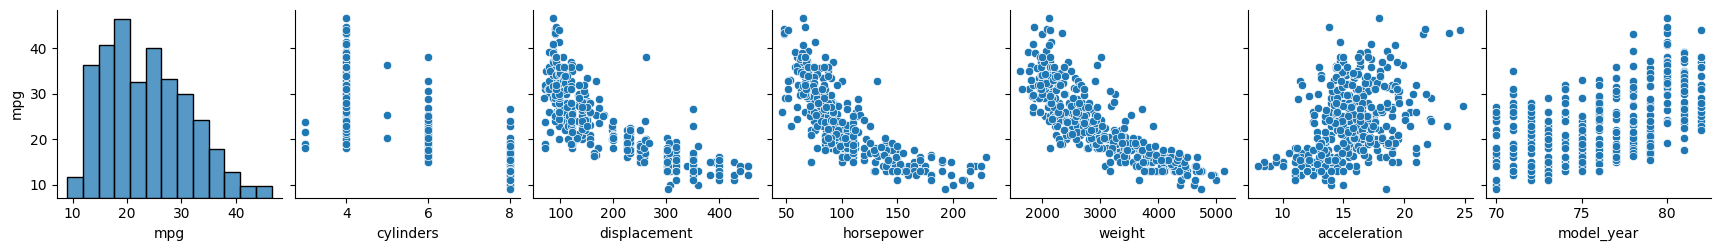

In [9]:
sns.pairplot(df, y_vars = "mpg");

Looking at model year, it does not seem explain the correlation seen above  

For example, if model year had a strong correlation with weight and/or displacement, it might mean that cars generally have gotten smaller over time and as such are more fuel efficient. However, the correlation does not seem strong enough to single handedly cover this explanation  

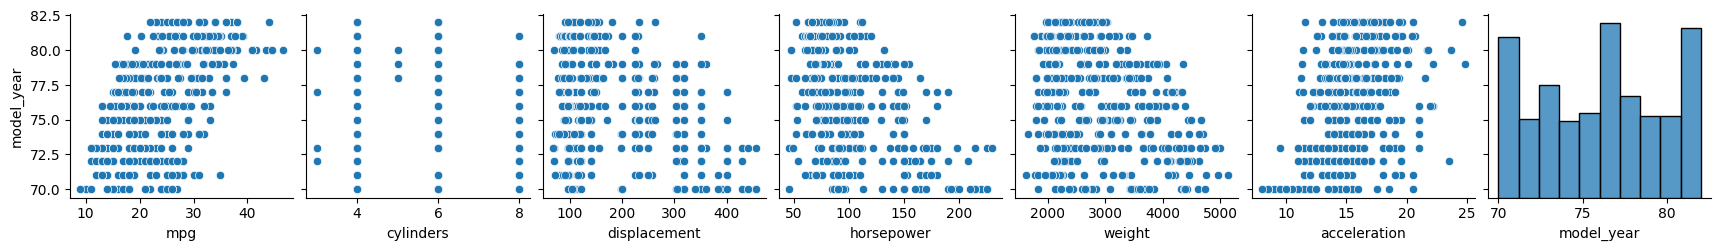

In [11]:
sns.pairplot(df, y_vars = "model_year");

Instead looking at weight as a possible explanation, and it does seem to have a strong correlation, at least with the first 4 variables in the plot below  

Likely, cars with smaller engines weight less, and therefore are more fuel efficient. There seems to be some trend towards lighter cars over time as well  

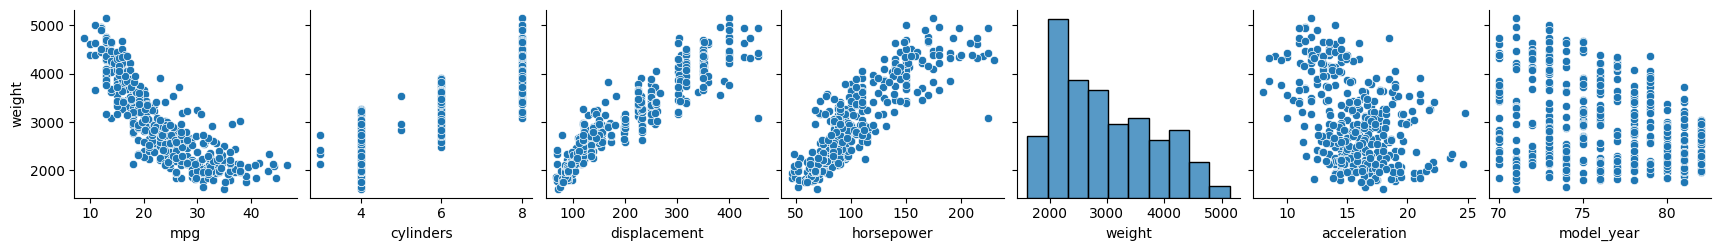

In [16]:
sns.pairplot(df, y_vars = "weight");

Finally looking to explain acceleration, the correlation seems unsure. Likely because a larger engine, while more powerful, also increases weight. This ends up with two variables on opposite ends both affecting acceleration positively  

For example:  
more powerful engine -> higher weight  
less powerful engine -> lower weight  

Both leading to some positive and negative effects for acceleration

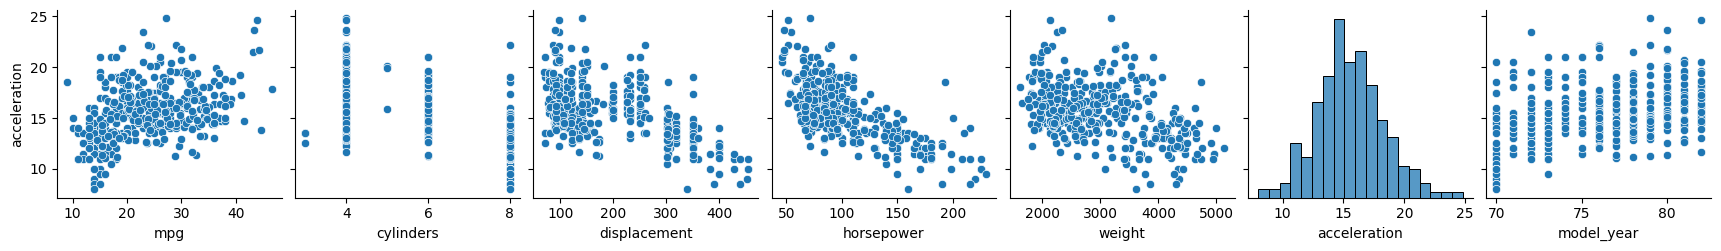

In [17]:
sns.pairplot(df, y_vars = "acceleration");

---
## E2.0 B) EDA Relevant Columns

Overall, all variables seem to have at least some correlation with mpg, and as such all will be left in for now.

As horsepower will end up being used, the null values have to be handled:

In [19]:
# dropping all samples that contain null values
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


---
## E2.0 C) Plotting